In [ ]:
pip install pandas numpy scikit-learn seaborn matplotlib


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [ ]:
users = pd.DataFrame(columns=["username", "password", "name", "email"])

def register_user(username, password, name, email):
    if username not in users["username"].values:
        users.loc[len(users)] = [username, password, name, email]
        print("Usuário cadastrado com sucesso!")
    else:
        print("Usuário já existe.")

def login_user(username, password):
    user = users[(users["username"] == username) & (users["password"] == password)]
    if not user.empty:
        print("Login bem-sucedido!")
        return user.iloc[0]
    else:
        print("Usuário ou senha incorretos.")
        return None

register_user("usuario1", "senha123", "João Silva", "joao@exemplo.com")
login_user("usuario1", "senha123")


Usuário cadastrado com sucesso!
Login bem-sucedido!


username            usuario1
password            senha123
name              João Silva
email       joao@exemplo.com
Name: 0, dtype: object

In [ ]:
consultas = pd.DataFrame({
    "username": ["usuario1", "usuario1", "usuario1"],
    "data": ["2023-11-01", "2023-11-02", "2023-11-03"],
    "descricao": ["Consulta de rotina", "Limpeza dental", "Avaliação ortodôntica"]
})

atividades = pd.DataFrame({
    "username": ["usuario1", "usuario1", "usuario1"],
    "data": ["2023-10-20", "2023-10-25", "2023-10-30"],
    "descricao": ["Exercício de prevenção", "Vídeo educativo", "Leitura de artigo"]
})

def exibir_historico_usuario(username):
    user_consultas = consultas[consultas["username"] == username].tail(3)
    user_atividades = atividades[atividades["username"] == username].tail(3)
    print(f"Últimas consultas para {username}:")
    print(user_consultas)
    print("\nÚltimas atividades para {username}:")
    print(user_atividades)

exibir_historico_usuario("usuario1")


Últimas consultas para usuario1:
   username        data              descricao
0  usuario1  2023-11-01     Consulta de rotina
1  usuario1  2023-11-02         Limpeza dental
2  usuario1  2023-11-03  Avaliação ortodôntica

Últimas atividades para {username}:
   username        data               descricao
0  usuario1  2023-10-20  Exercício de prevenção
1  usuario1  2023-10-25         Vídeo educativo
2  usuario1  2023-10-30       Leitura de artigo


Data: 2023-10-15 Hora: 14:00
Descrição: Fratura de dente


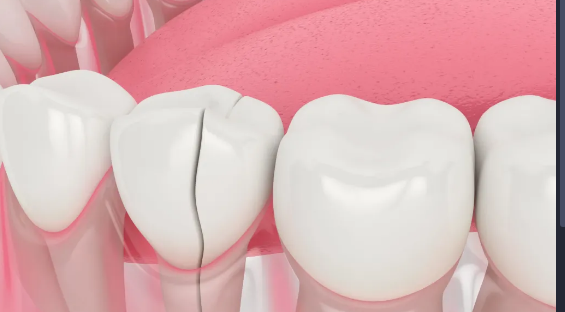



Data: 2023-11-05 Hora: 10:30
Descrição: Sangramento gengival


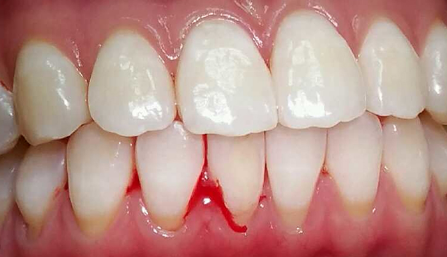

In [ ]:
import pandas as pd
from IPython.display import Image, display

sinistros = pd.DataFrame({
    "username": ["usuario1", "usuario1"],
    "data": ["2023-10-15", "2023-11-05"],
    "hora": ["14:00", "10:30"],
    "descricao": ["Fratura de dente", "Sangramento gengival"],
    "imagem": ["fratura.PNG", "gengival.png"]
})

def exibir_sinistro(username):
    user_sinistros = sinistros[sinistros["username"] == username]
    for i, row in user_sinistros.iterrows():
        print(f"Data: {row['data']} Hora: {row['hora']}")
        print(f"Descrição: {row['descricao']}")
        
        # Exibe a imagem associada ao sinistro
        display(Image(filename=row['imagem']))
        print("\n")

exibir_sinistro("usuario1")



In [17]:
def listar_sinistros(username):
    user_sinistros = sinistros[sinistros["username"] == username]
    print(user_sinistros[["data", "hora", "descricao", "imagem"]])

listar_sinistros("usuario1")


         data   hora             descricao       imagem
0  2023-10-15  14:00      Fratura de dente  url_imagem1
1  2023-11-05  10:30  Sangramento gengival  url_imagem2


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\LorenzoPc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LorenzoPc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LorenzoPc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

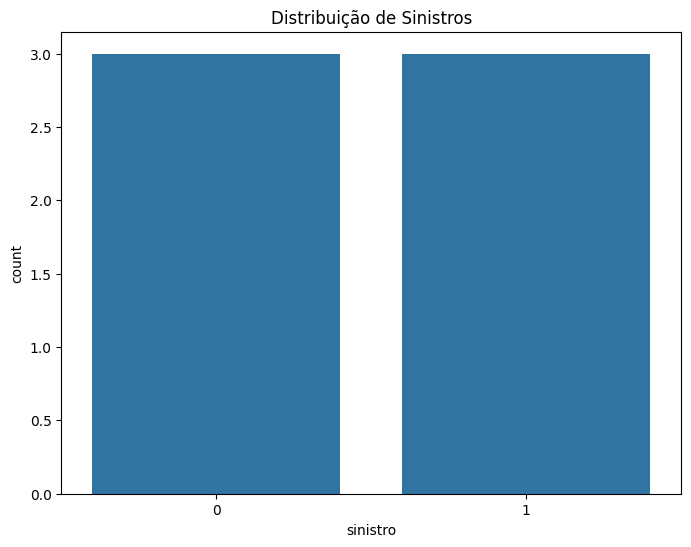

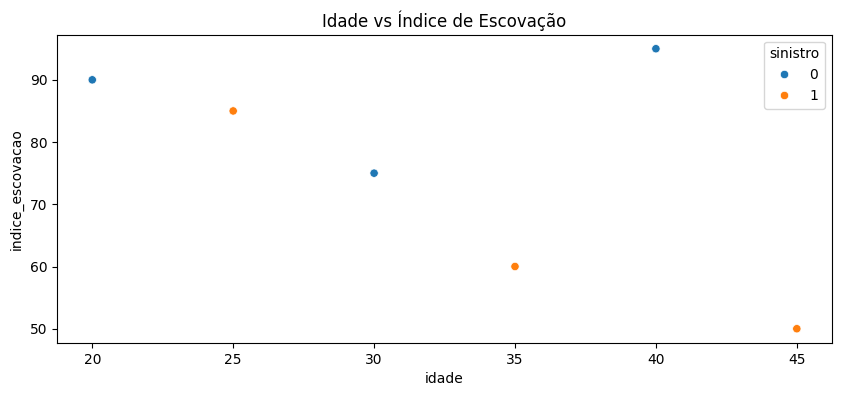

In [27]:
dados_saude = pd.DataFrame({
    "idade": [20, 25, 30, 35, 40, 45],
    "frequencia_consulta": [2, 3, 2, 1, 3, 1],
    "indice_escovacao": [90, 85, 75, 60, 95, 50],
    "sinistro": [0, 1, 0, 1, 0, 1]
})

# Divisão dos dados para treinamento
X = dados_saude[["idade", "frequencia_consulta", "indice_escovacao"]]
y = dados_saude["sinistro"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Gráfico 1: Distribuição de Sinistros com tamanho ajustado
plt.figure(figsize=(8, 6))  # Largura 8, Altura 6
sns.countplot(x="sinistro", data=dados_saude)
plt.title("Distribuição de Sinistros")
plt.show()

# Gráfico 2: Gráfico de Dispersão entre Idade e Índice de Escovação com tamanho diferente
plt.figure(figsize=(10, 4))  # Largura 10, Altura 4
sns.scatterplot(x="idade", y="indice_escovacao", data=dados_saude, hue="sinistro")
plt.title("Idade vs Índice de Escovação")
plt.show()